# Sixth Practice ML

In this practice, we will learn how to train with **CV (Cross-Validation)** and how to choose features with **Feature Selection** algorithms.  
We will use [**sweetviz**](https://pypi.org/project/sweetviz/) to show the DataFrame report.   
We will also use [**tqdm**](https://tqdm.github.io/) to show a progress bar.  

## Downloads, Imports, and Definitions

We update packages that their Colab version is too old.  

In [ ]:
# update plotly and pandas_profiling version
!pip install --upgrade plotly
!pip install sweetviz

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.0)


We import our regular packages.

In [ ]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Data Exploration
We use a dataset of used Ford cars.  

### Dataset Information  
The types of the cars are:

#### **SE**  
![Ford SE](https://user-images.githubusercontent.com/41818563/101286278-3a05bd00-37f2-11eb-85e3-043d75cda135.jpg)  
*2020 Ford Fusion Hybrid SE FWD*


#### **SES**   
![Ford SES](https://user-images.githubusercontent.com/41818563/101286246-0fb3ff80-37f2-11eb-998b-ba8ffde6137f.jpg)  
*2020 Ford EcoSport SES 4WD*

#### **SEL** 
![Ford SEL](https://user-images.githubusercontent.com/41818563/101286164-afbd5900-37f1-11eb-830e-3dde1798e528.jpg)  
*2020 Ford Edge SEL FWD*


### Attribute Information  
1. **year**: the year of manufacturing (2000-2011)
2. **model**: the model of the car (SE, SES, SEL)
3. **price**: the price of the car (3800-21992)
4. **mileage**: the number of mileage that the car has done (4867-151479)
5. **color**: the color of the car ('Yellow', 'Gray', 'Silver', 'White', 'Blue', 'Black', 'Green', 'Red', 'Gold')
6. **transmission**: the transmission of the car ('AUTO', 'MANUAL')

### Target Information
* **price**: we use the price as the target (regression problem)

![used-car-market](https://user-images.githubusercontent.com/41818563/101283886-f9a04200-37e5-11eb-87a1-a6db6e5c1b8e.jpg)

Let's download the dataset from Github and explore it with Pandas tools.  

In [ ]:
# download usedcars.csv file from Github 
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/usedcars.csv

--2020-12-07 23:02:07--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/usedcars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4732 (4.6K) [text/plain]
Saving to: ‘usedcars.csv.4’

usedcars.csv.4      100%[===================>]   4.62K  --.-KB/s    in 0s      

2020-12-07 23:02:07 (42.9 MB/s) - ‘usedcars.csv.4’ saved [4732/4732]



In [ ]:
# load the usedcars csv file
usedcars_df = pd.read_csv('usedcars.csv')
usedcars_df

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


In [ ]:
# show usedcars_df info
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


In [ ]:
# show usedcars_df description
usedcars_df.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


We can also use `sweetviz` to show a report on the data.  
This report is lighter than `pandas_profiling` so it might work better on large datasets.  


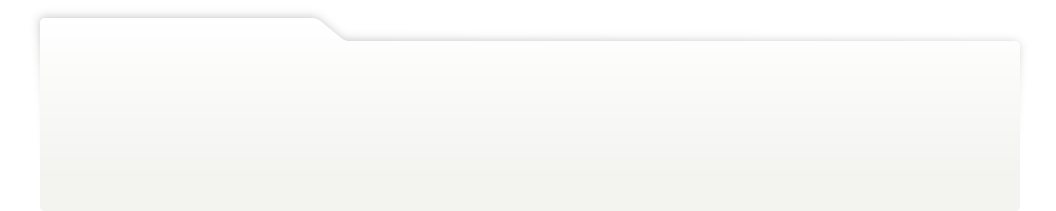
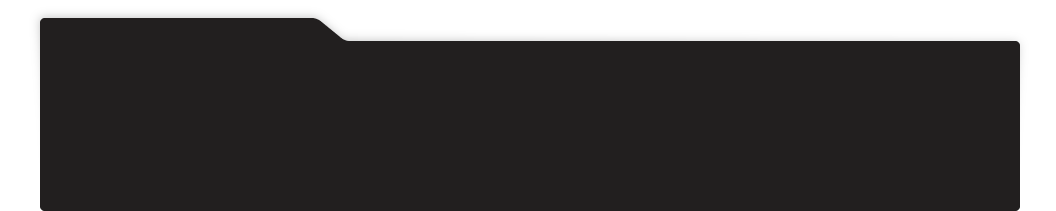
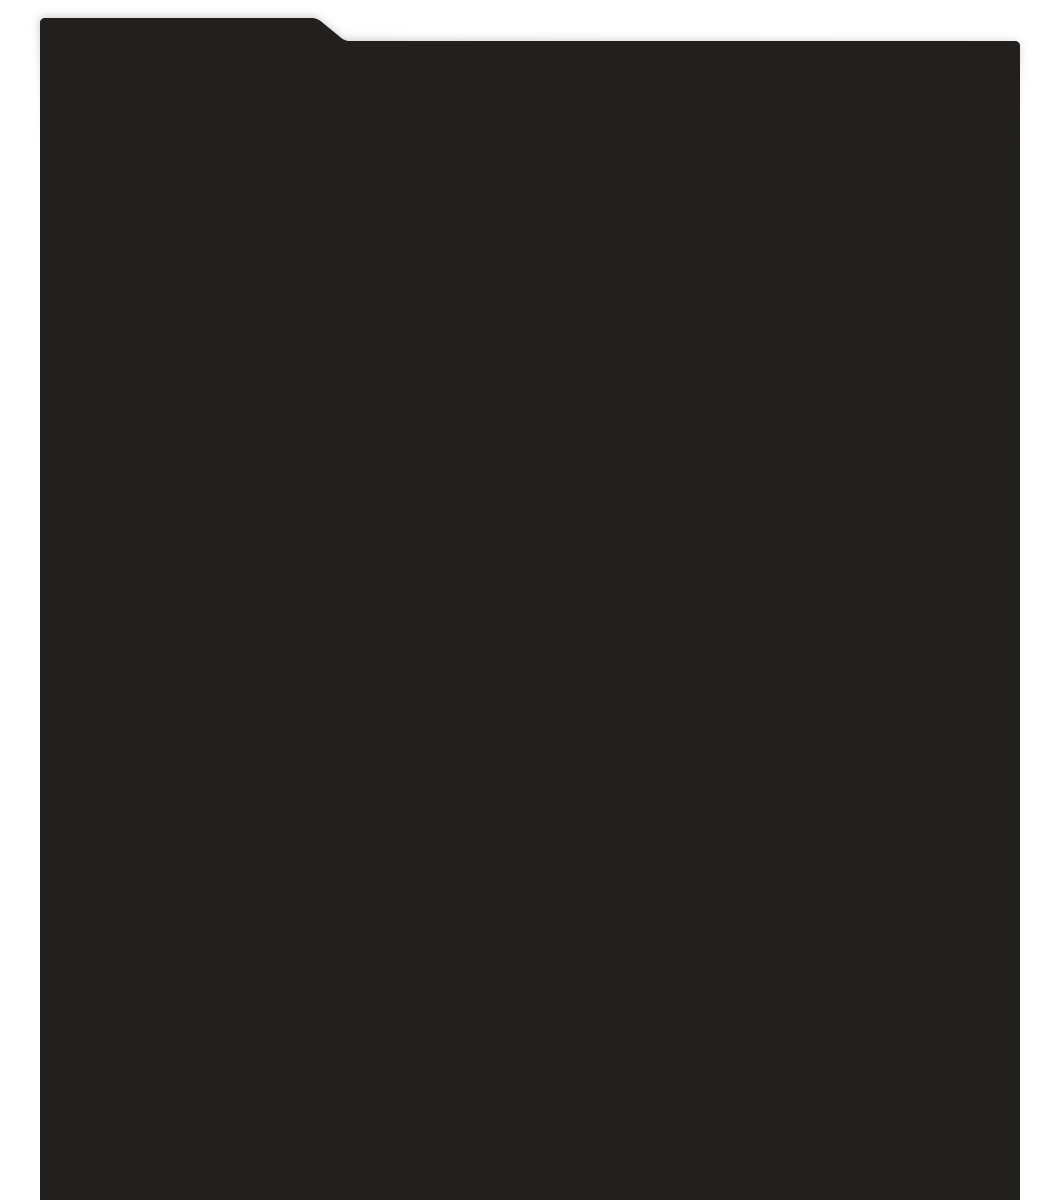
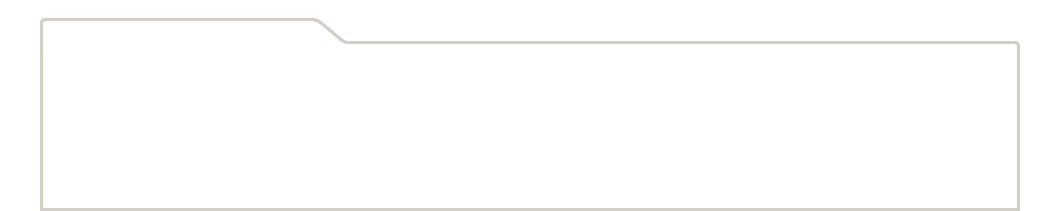
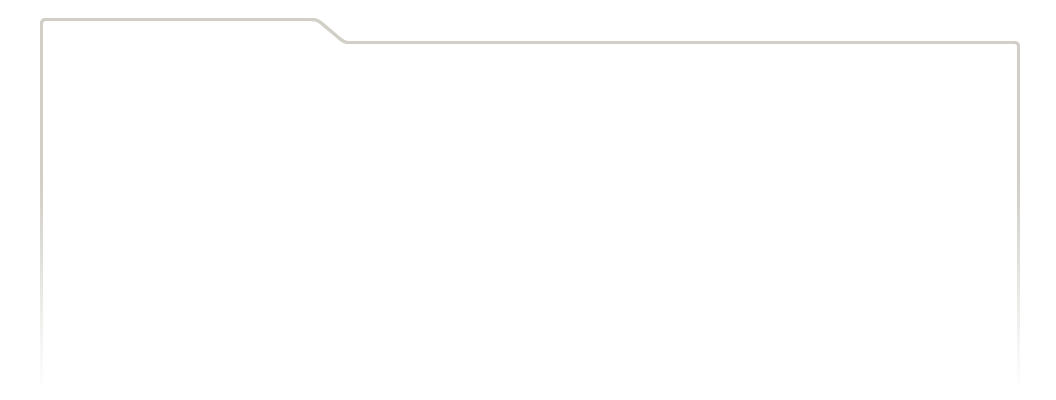
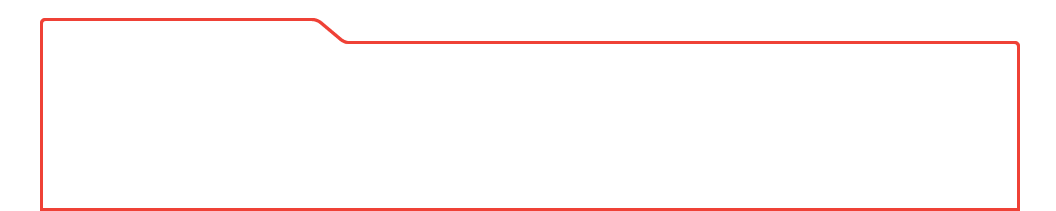
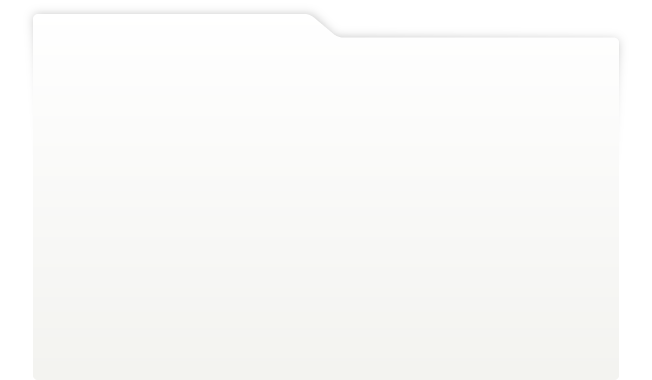
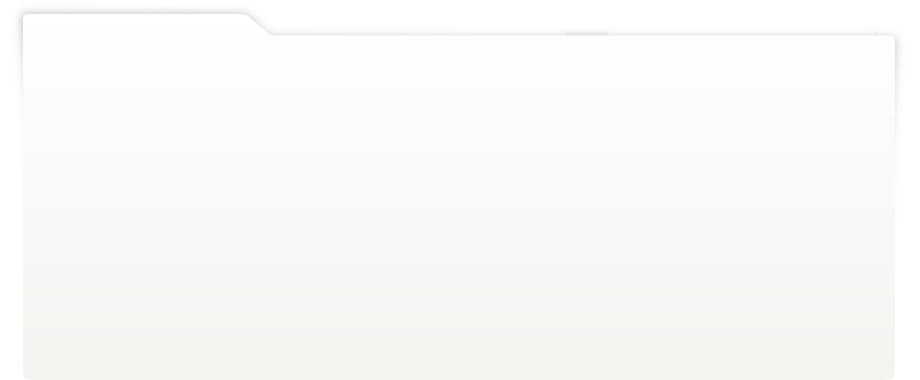
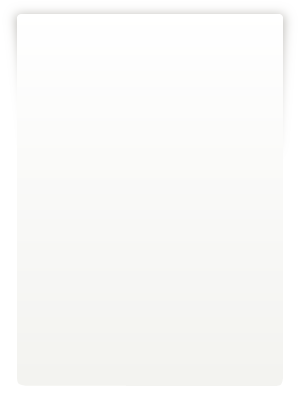
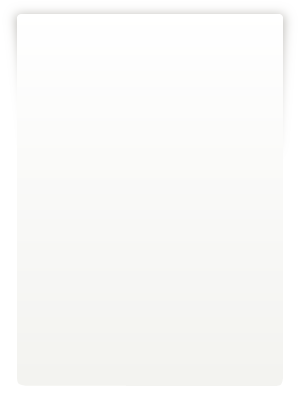
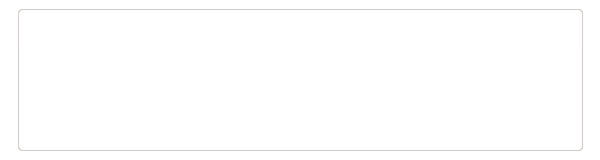
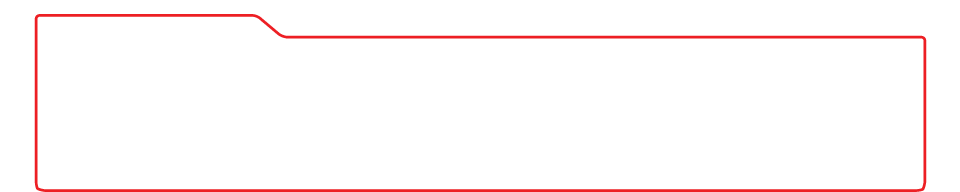
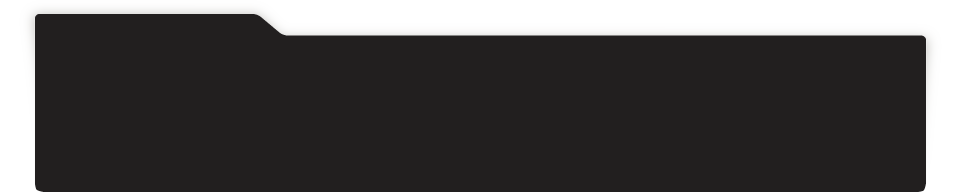
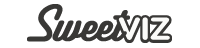
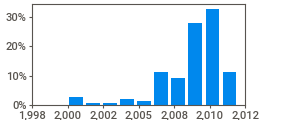
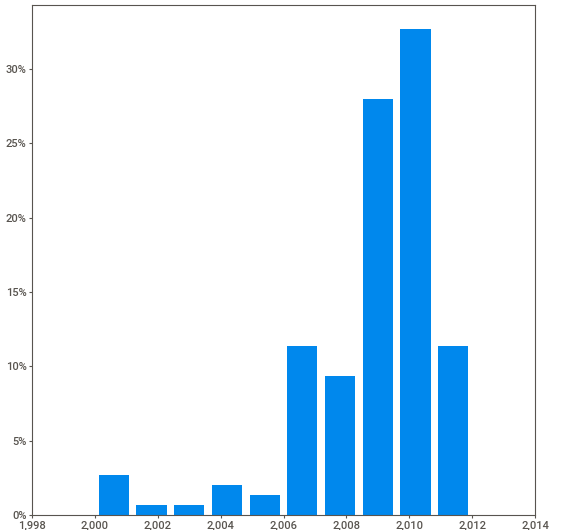
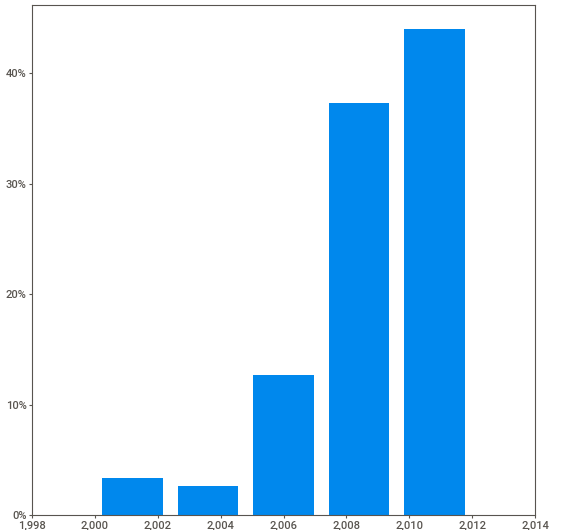
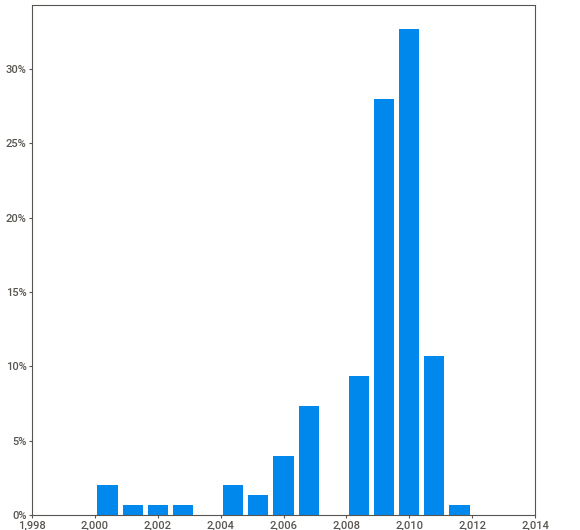
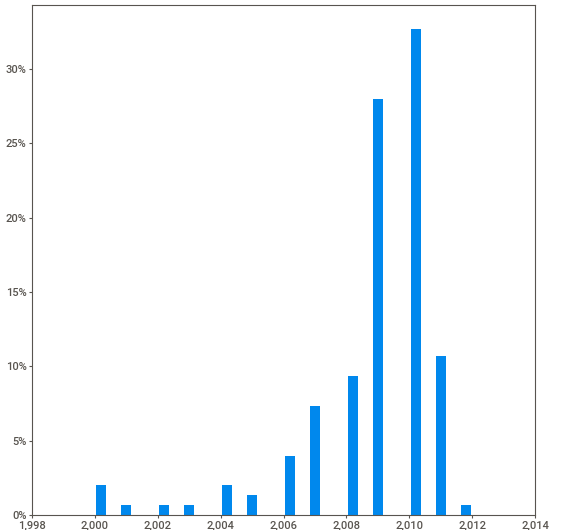
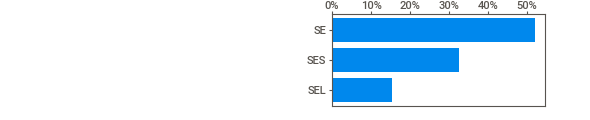
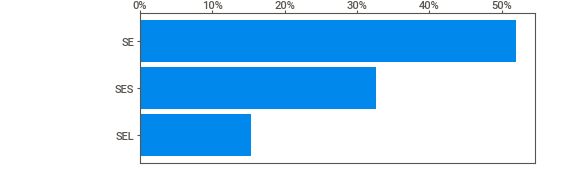
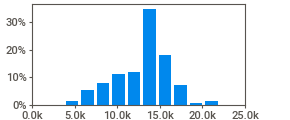
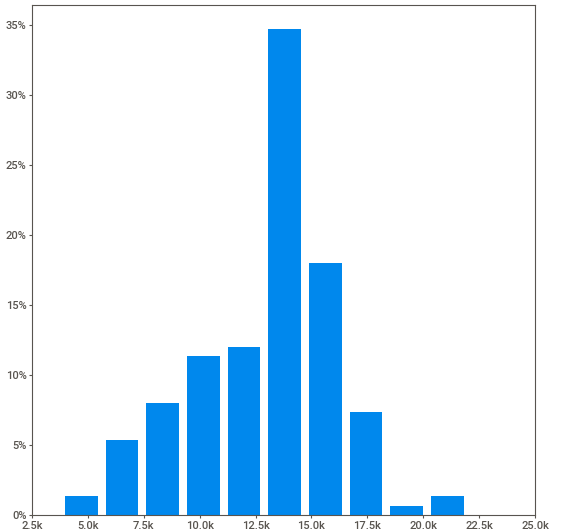
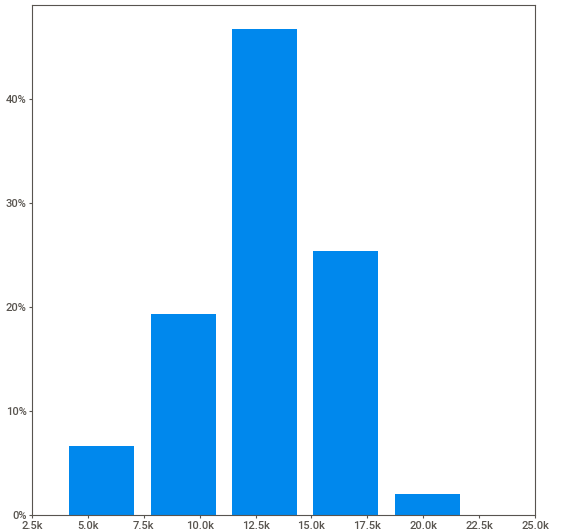
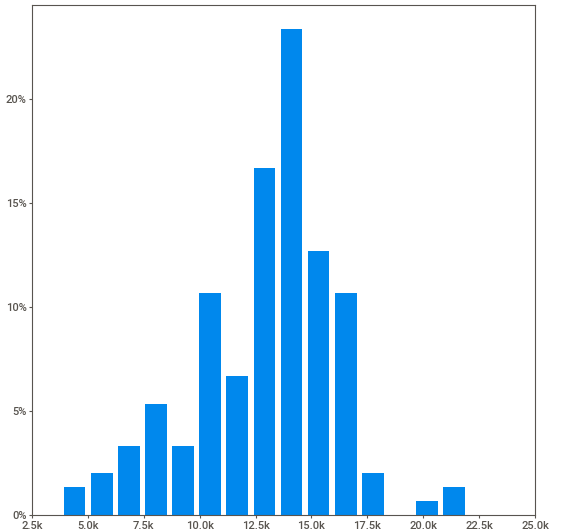
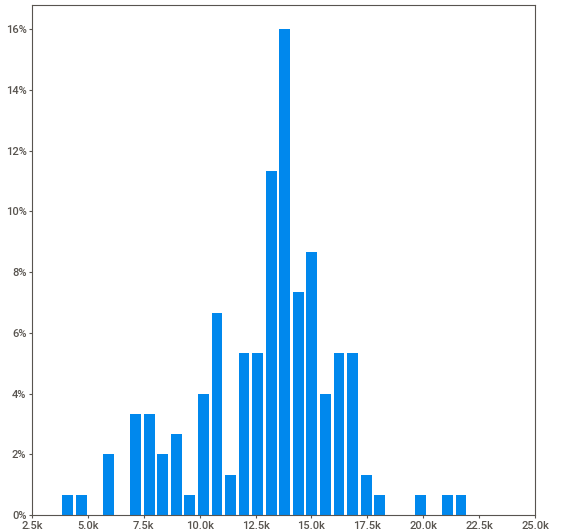
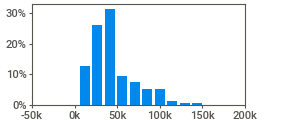
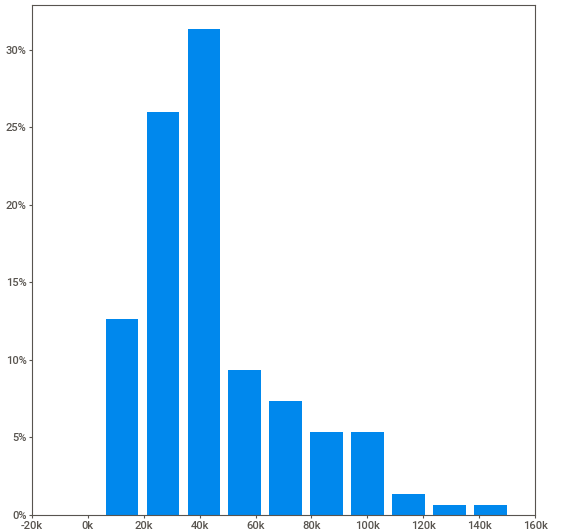
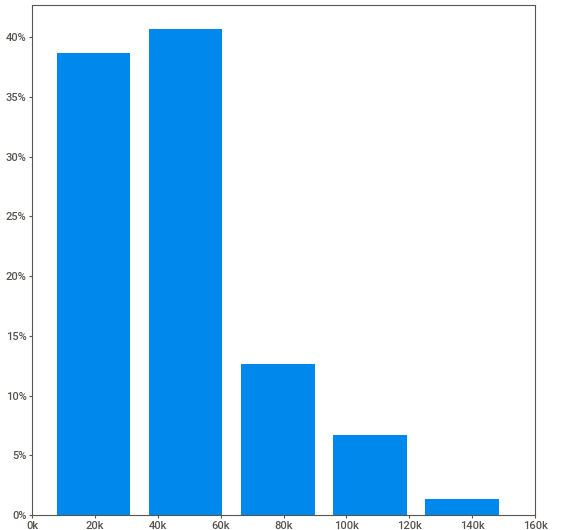
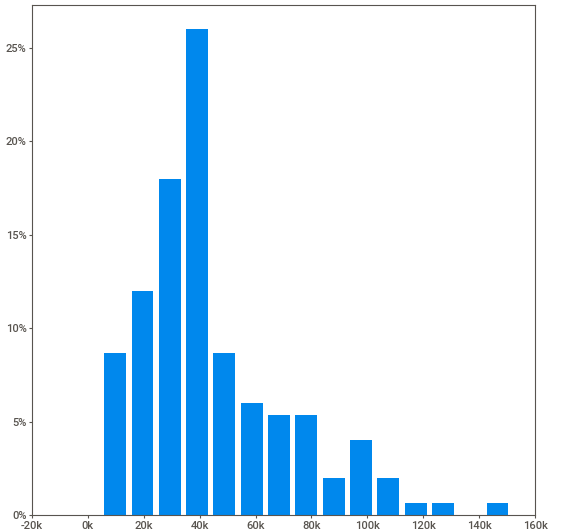
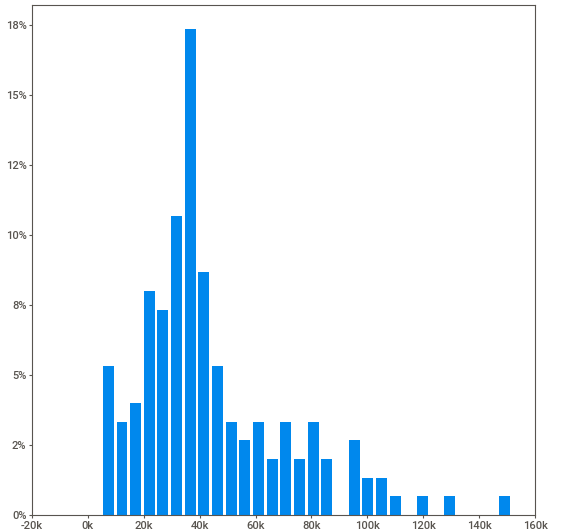
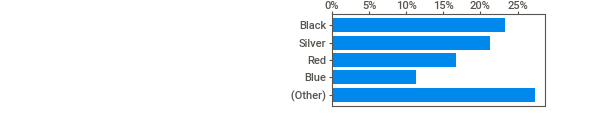
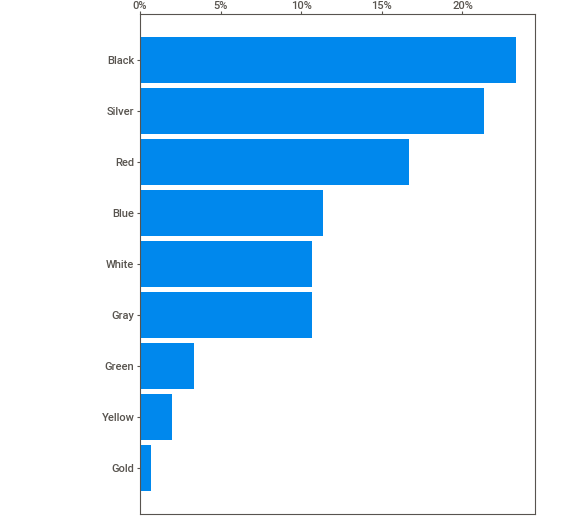
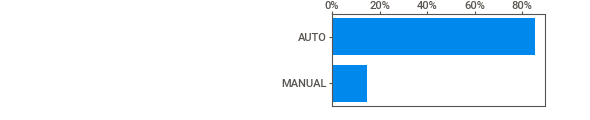
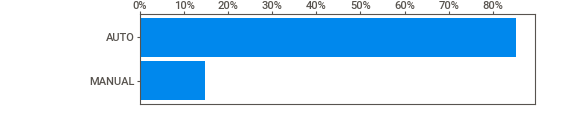
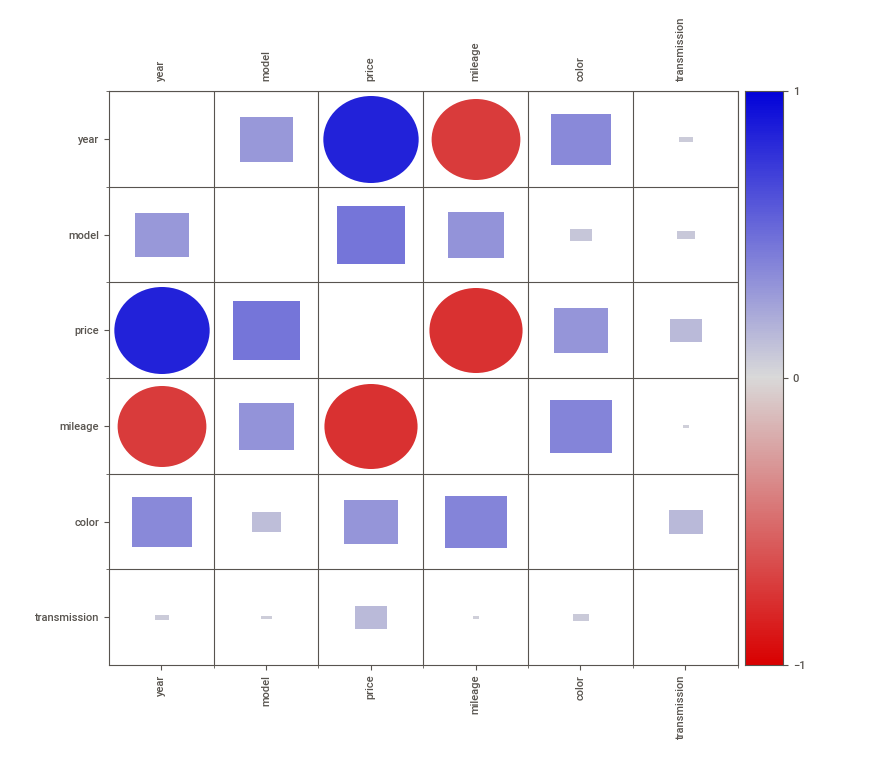
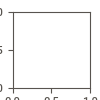

In [ ]:
#  import sweetviz and show report on usedcars_df
import sweetviz as sw

usedcars_report = sw.analyze(usedcars_df)
usedcars_report.show_notebook(layout='vertical')

We can also show a comparing report on two subsets of the data.  
Let's compare the `AUTO` transmission and the `MANUAL` transmission.  


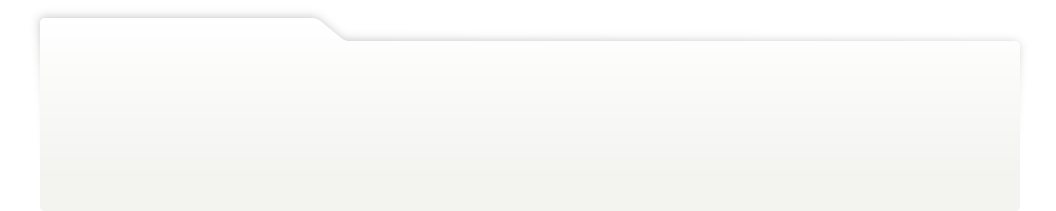
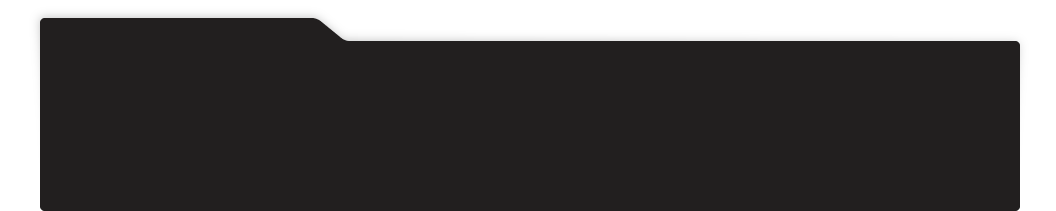
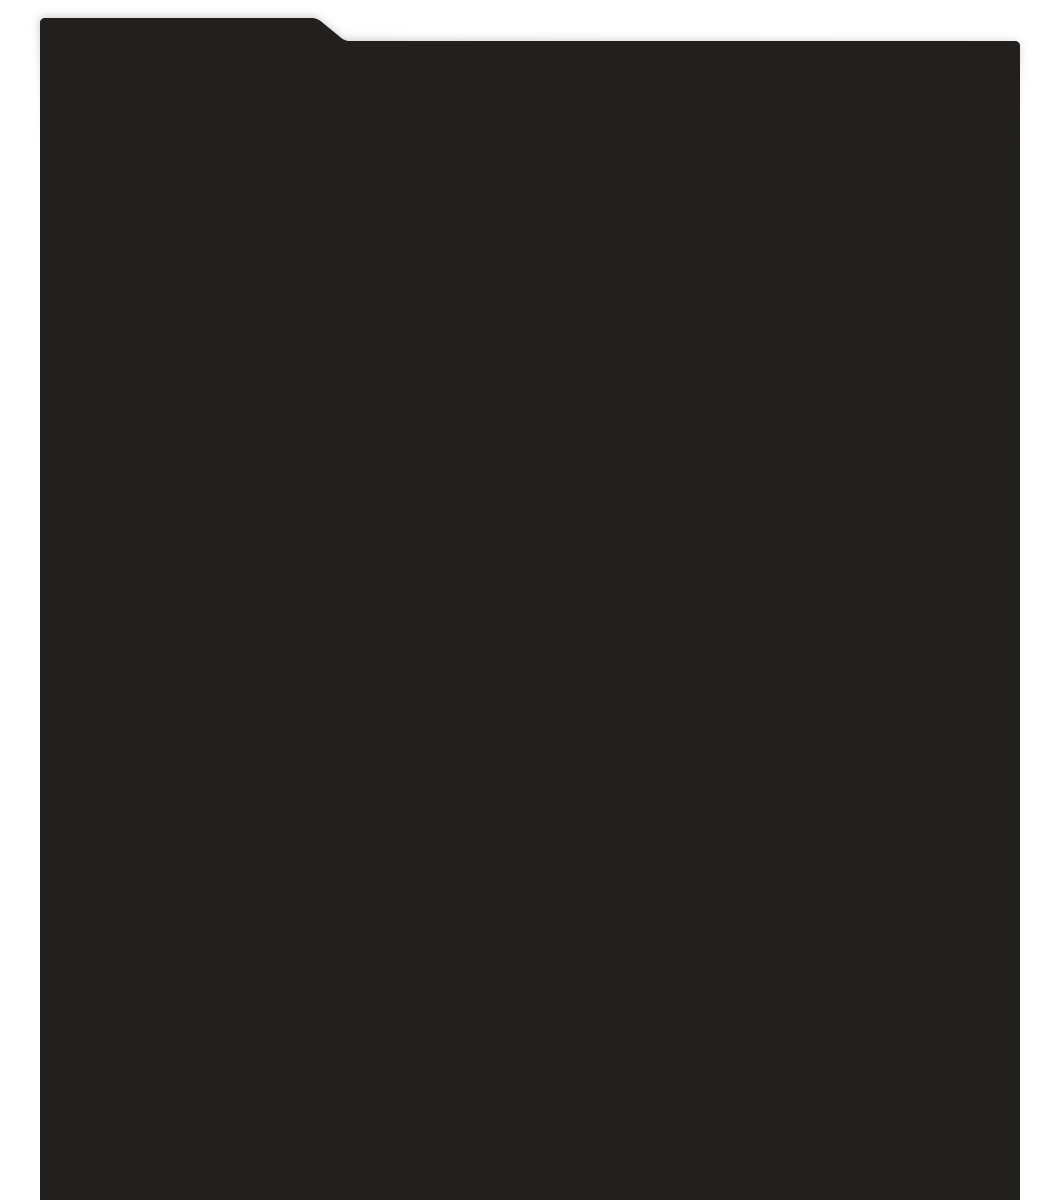
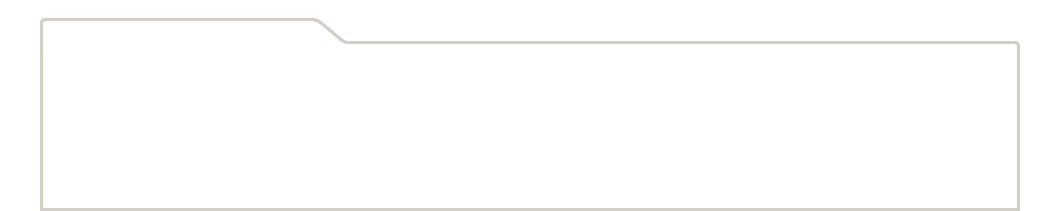
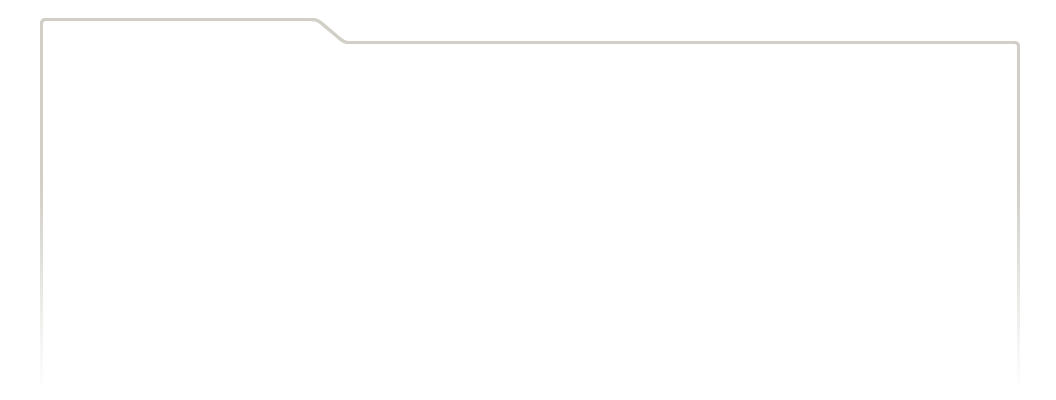
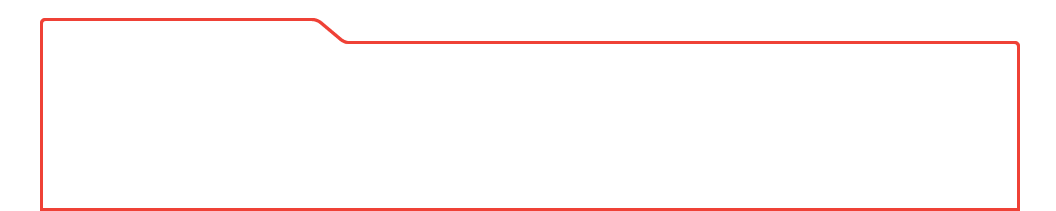
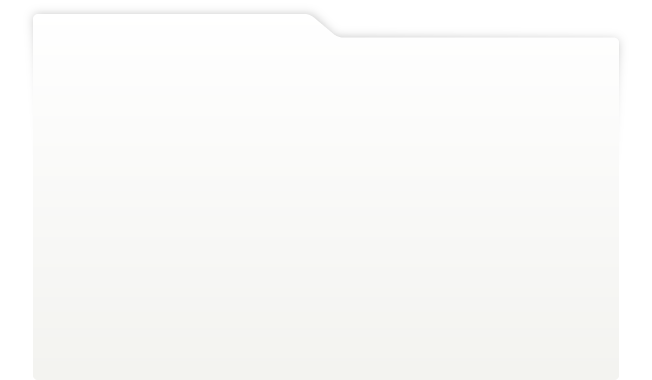
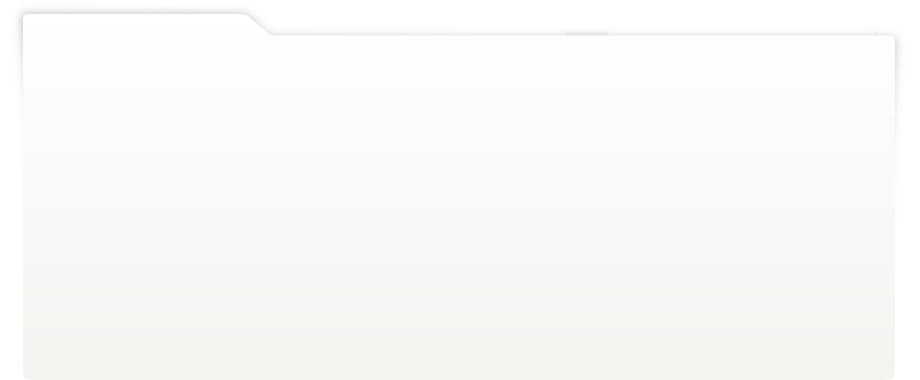
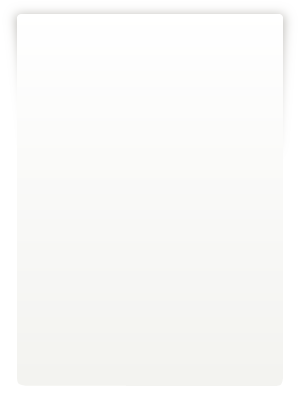
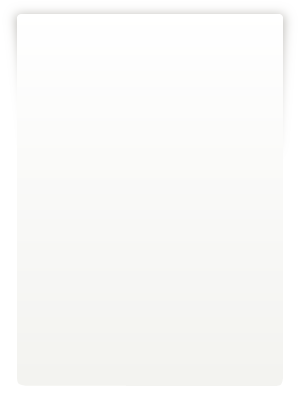
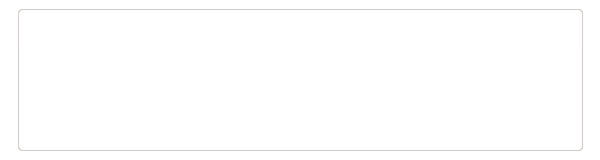
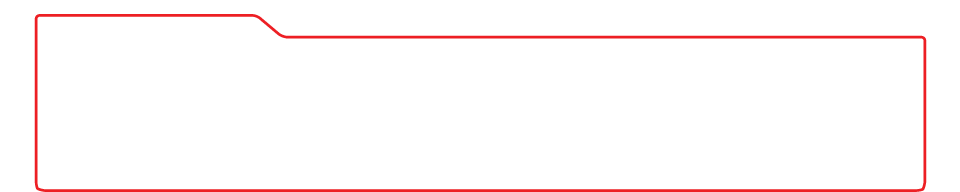
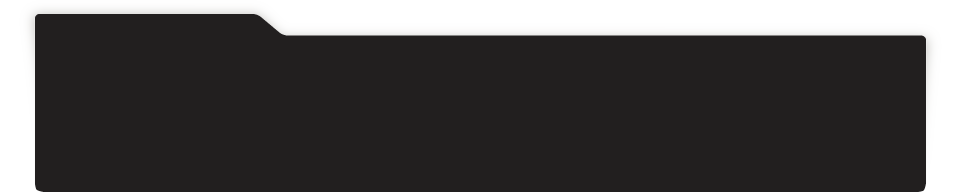
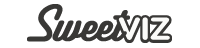
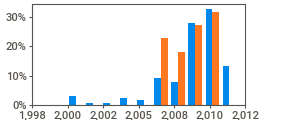
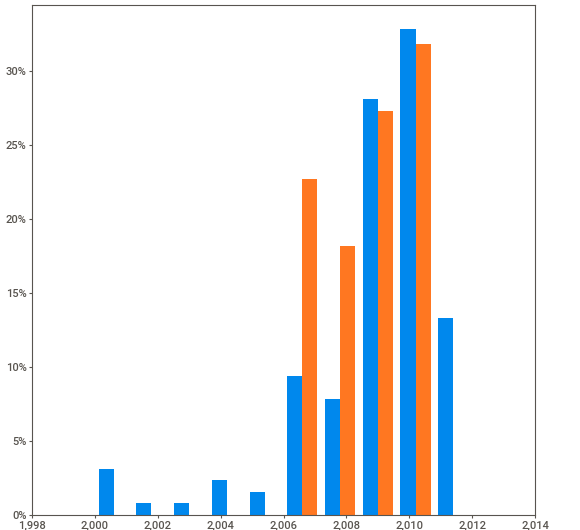
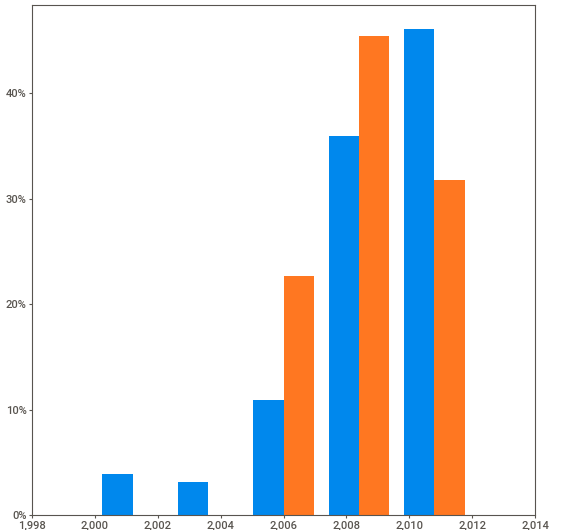
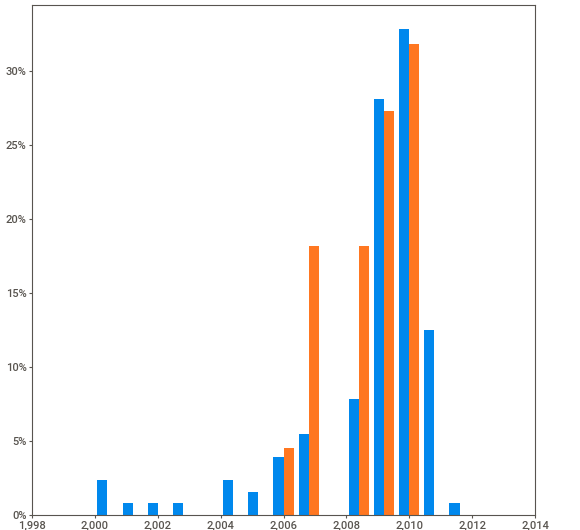
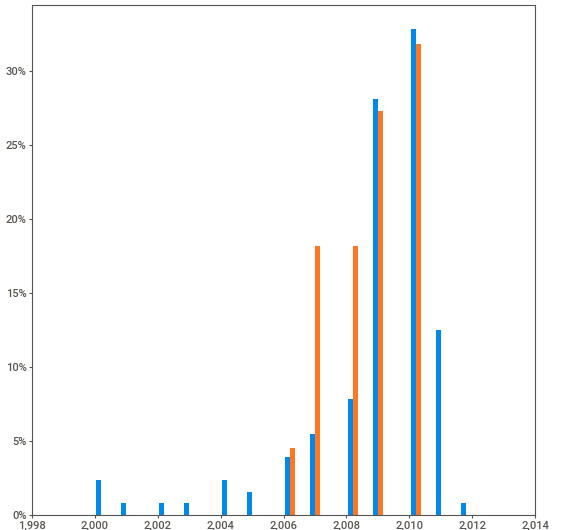
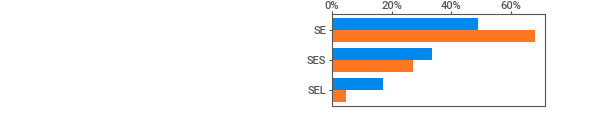
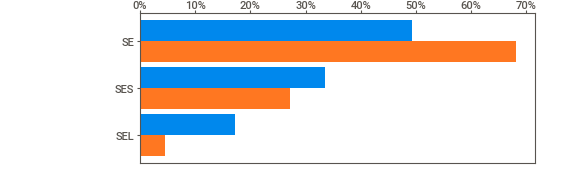
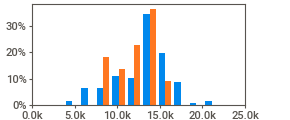
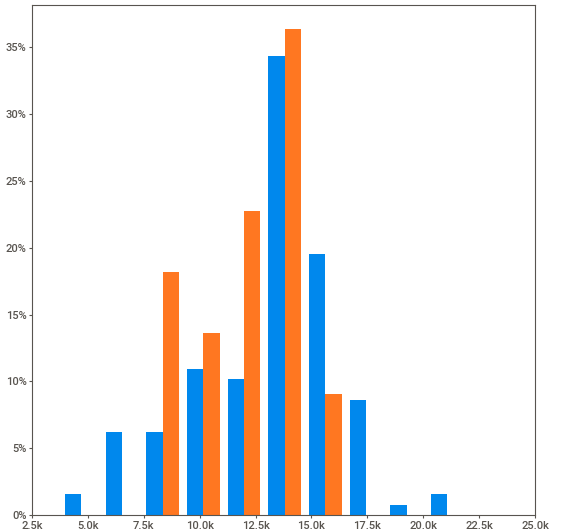
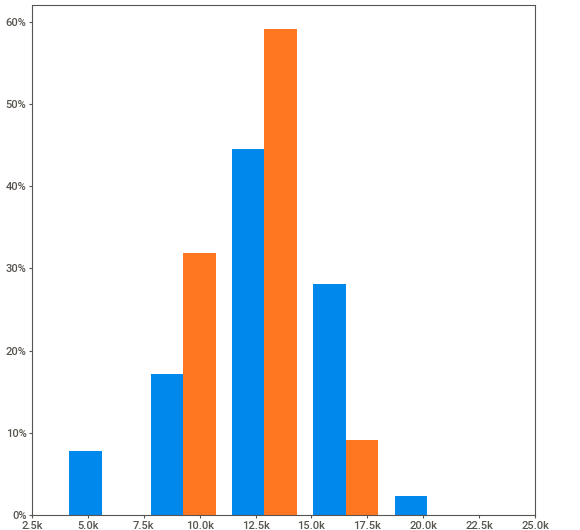
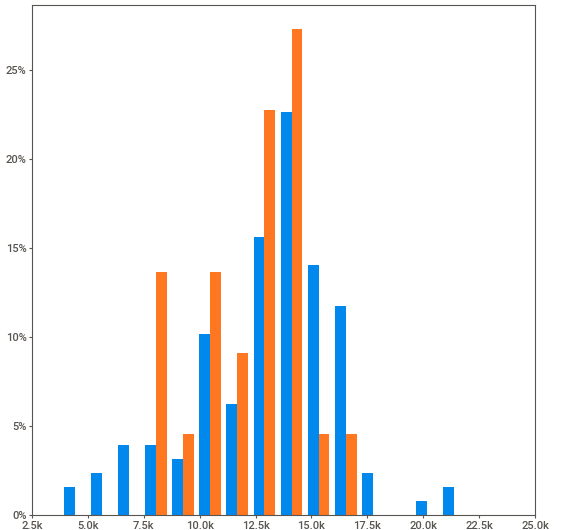
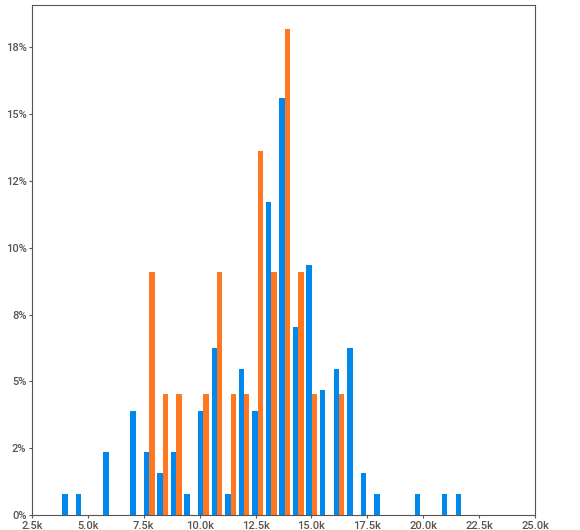
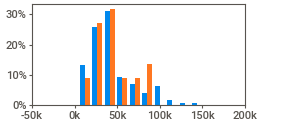
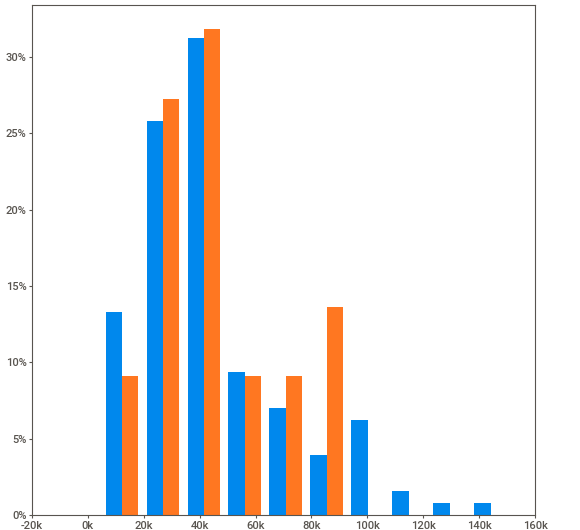
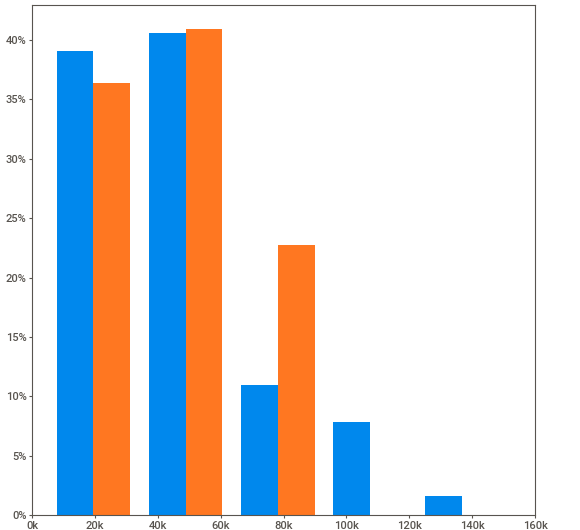
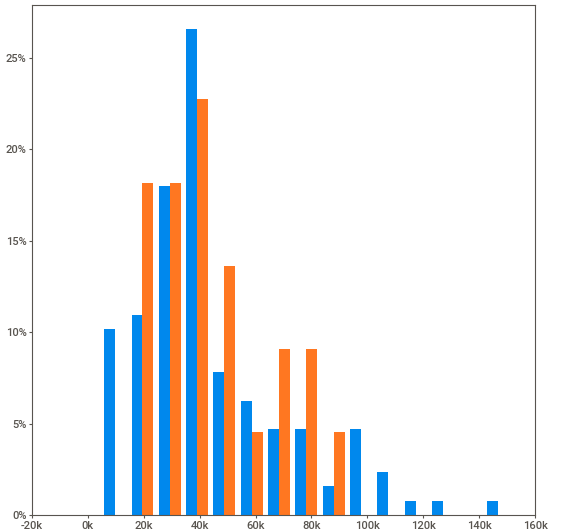
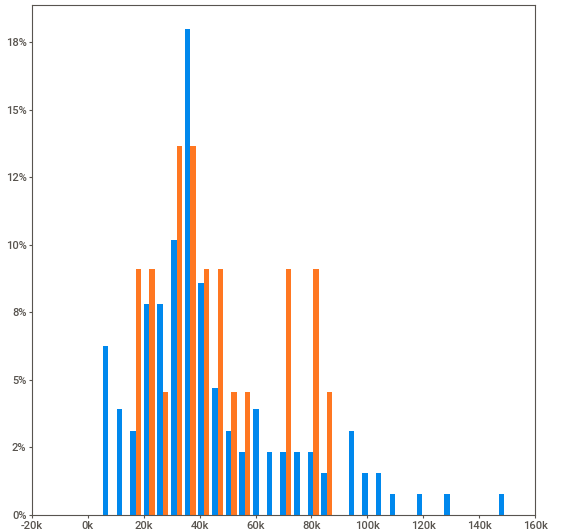
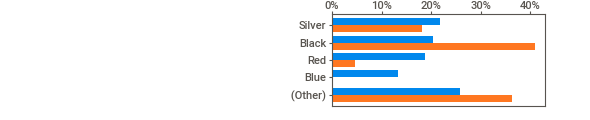
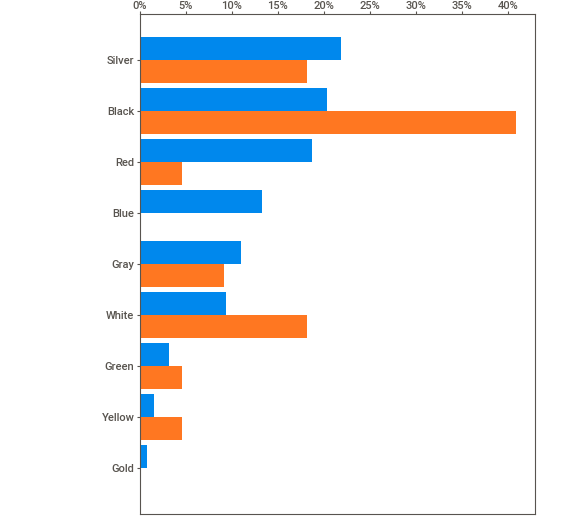
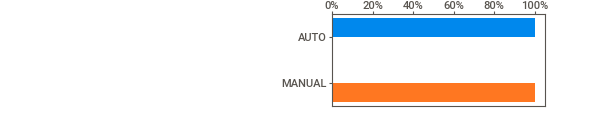
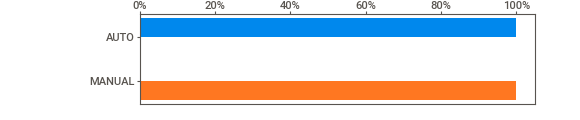
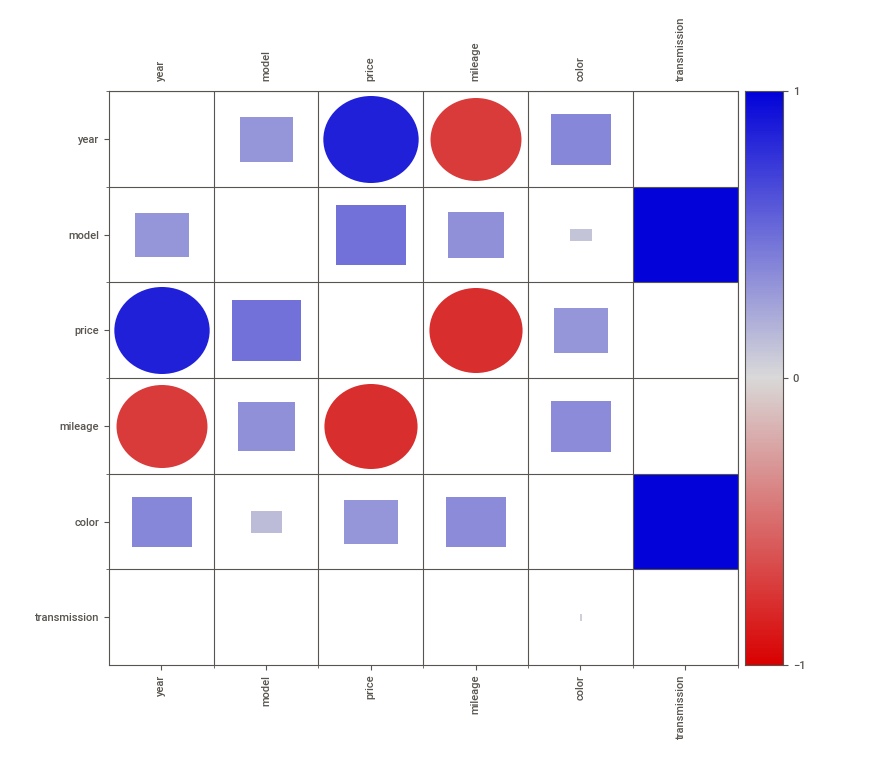
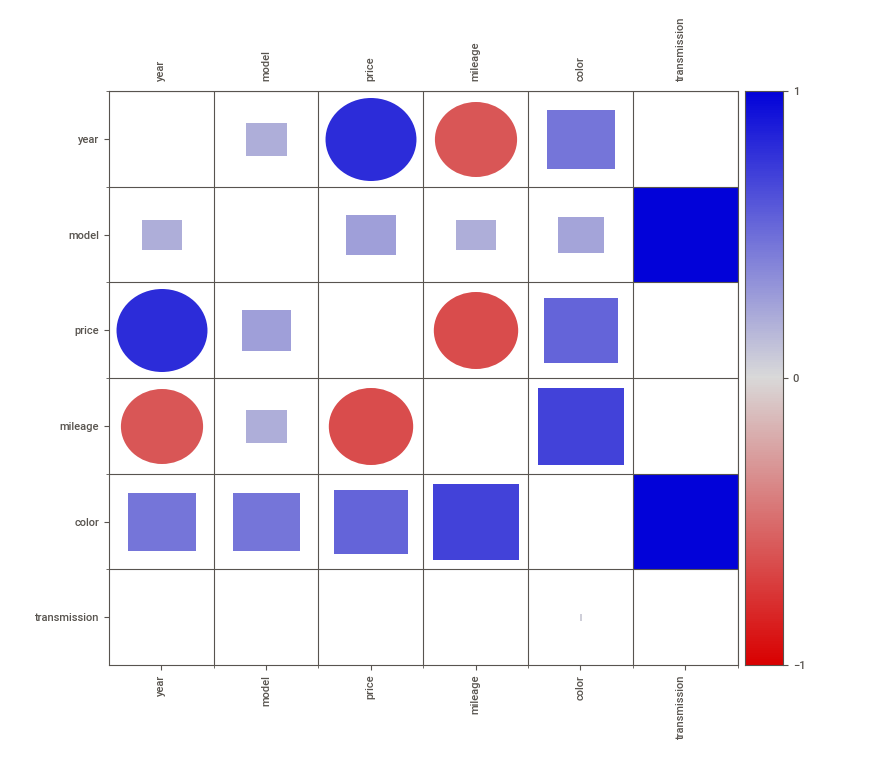

In [ ]:
# show comparing report between AUTO and MANUAL
usedcars_model_report = sw.compare_intra(usedcars_df, condition_series=usedcars_df["transmission"]=='AUTO', names=usedcars_df["transmission"].unique())
usedcars_model_report.show_notebook(layout='vertical')

## Cross-Validation
We can use CV (Cross-Validation) instead of breaking the data to train-validation splits.    
When we use CV, we have better predictions of the test results.  
It is similar to splitting the data, but we make sure that our split won't affect our result (we try a few possible splits).  
We can use 2 CV:
1. **KFold**
2. **LPO** (Leave P out)

We will use **KFold** when we want speed.  
We will use **LPO** when we want to be more precise and better predict the test score.  
Let's start with Scikit-learn [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).   
Let's split the data into `k=5` folds.   



In [ ]:
# divide the data to features and target
t = usedcars_df['price'].copy()
X = usedcars_df.drop(['price'], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0      21992
1      20995
2      19995
3      17809
4      17500
       ...  
145     6200
146     5995
147     5980
148     4899
149     3800
Name: price, Length: 150, dtype: int64


X


,year,model,mileage,color,transmission
0,2011,SEL,7413,Yellow,AUTO
1,2011,SEL,10926,Gray,AUTO
2,2011,SEL,7351,Silver,AUTO
3,2011,SEL,11613,Gray,AUTO
4,2012,SE,8367,White,AUTO
...,...,...,...,...,...
145,2006,SES,95000,Silver,AUTO
146,2002,SE,87003,Red,AUTO
147,2000,SE,96841,Red,AUTO
148,2001,SE,151479,Yellow,AUTO


In [ ]:
# print the folds of the data
from sklearn.model_selection import KFold

kf = KFold(n_splits=2, shuffle=True, random_state=1)
for i, (train_ids, val_ids) in enumerate(kf.split(X)):
    print('Split', i)
    print("Train:", train_ids)
    display(X.loc[train_ids])
    display(t.loc[train_ids])
    print("Val:", val_ids)
    display(X.loc[val_ids])
    display(t.loc[val_ids])
    print()

Split 0
Train: [  0   1   3   7   8   9  10  13  15  20  21  22  23  24  25  26  27  30
  32  34  37  38  41  43  47  49  50  52  57  60  61  63  64  67  68  70
  71  72  74  76  79  80  81  82  83  86  87  88  89  93  96  97 100 101
 105 106 109 111 115 116 121 124 129 130 133 134 136 137 140 142 143 145
 147 148 149]


,year,model,mileage,color,transmission
0,2011,SEL,7413,Yellow,AUTO
1,2011,SEL,10926,Gray,AUTO
3,2011,SEL,11613,Gray,AUTO
7,2010,SEL,21026,Silver,AUTO
8,2011,SES,32655,Silver,AUTO
...,...,...,...,...,...
143,2004,SES,101130,Gray,AUTO
145,2006,SES,95000,Silver,AUTO
147,2000,SE,96841,Red,AUTO
148,2001,SE,151479,Yellow,AUTO


0      21992
1      20995
3      17809
7      16995
8      16995
       ...  
143     6980
145     6200
147     5980
148     4899
149     3800
Name: price, Length: 75, dtype: int64

Val: [  2   4   5   6  11  12  14  16  17  18  19  28  29  31  33  35  36  39
  40  42  44  45  46  48  51  53  54  55  56  58  59  62  65  66  69  73
  75  77  78  84  85  90  91  92  94  95  98  99 102 103 104 107 108 110
 112 113 114 117 118 119 120 122 123 125 126 127 128 131 132 135 138 139
 141 144 146]


,year,model,mileage,color,transmission
2,2011,SEL,7351,Silver,AUTO
4,2012,SE,8367,White,AUTO
5,2010,SEL,25125,Silver,AUTO
6,2011,SEL,27393,Blue,AUTO
11,2011,SES,9199,Silver,AUTO
...,...,...,...,...,...
138,2003,SES,96000,White,AUTO
139,2005,SES,59013,Red,AUTO
141,2007,SE,86862,White,AUTO
144,2004,SES,119720,Black,AUTO


2      19995
4      17500
5      17495
6      17000
11     16992
       ...  
138     7900
139     7488
141     6995
144     6950
146     5995
Name: price, Length: 75, dtype: int64


Split 1
Train: [  2   4   5   6  11  12  14  16  17  18  19  28  29  31  33  35  36  39
  40  42  44  45  46  48  51  53  54  55  56  58  59  62  65  66  69  73
  75  77  78  84  85  90  91  92  94  95  98  99 102 103 104 107 108 110
 112 113 114 117 118 119 120 122 123 125 126 127 128 131 132 135 138 139
 141 144 146]


,year,model,mileage,color,transmission
2,2011,SEL,7351,Silver,AUTO
4,2012,SE,8367,White,AUTO
5,2010,SEL,25125,Silver,AUTO
6,2011,SEL,27393,Blue,AUTO
11,2011,SES,9199,Silver,AUTO
...,...,...,...,...,...
138,2003,SES,96000,White,AUTO
139,2005,SES,59013,Red,AUTO
141,2007,SE,86862,White,AUTO
144,2004,SES,119720,Black,AUTO


2      19995
4      17500
5      17495
6      17000
11     16992
       ...  
138     7900
139     7488
141     6995
144     6950
146     5995
Name: price, Length: 75, dtype: int64

Val: [  0   1   3   7   8   9  10  13  15  20  21  22  23  24  25  26  27  30
  32  34  37  38  41  43  47  49  50  52  57  60  61  63  64  67  68  70
  71  72  74  76  79  80  81  82  83  86  87  88  89  93  96  97 100 101
 105 106 109 111 115 116 121 124 129 130 133 134 136 137 140 142 143 145
 147 148 149]


,year,model,mileage,color,transmission
0,2011,SEL,7413,Yellow,AUTO
1,2011,SEL,10926,Gray,AUTO
3,2011,SEL,11613,Gray,AUTO
7,2010,SEL,21026,Silver,AUTO
8,2011,SES,32655,Silver,AUTO
...,...,...,...,...,...
143,2004,SES,101130,Gray,AUTO
145,2006,SES,95000,Silver,AUTO
147,2000,SE,96841,Red,AUTO
148,2001,SE,151479,Yellow,AUTO


0      21992
1      20995
3      17809
7      16995
8      16995
       ...  
143     6980
145     6200
147     5980
148     4899
149     3800
Name: price, Length: 75, dtype: int64

We can also use Scikit-learn [LeavePOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeavePOut.html).  
We can use LPO as LOO (Leave One Out) when specifying `p=1`. 
Let's leave `p=3` out. 
Lets use [tqdm](https://tqdm.github.io/) to show progress bar.

In [ ]:
# find generator length
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [ ]:
# calculate the groups of the data
from sklearn.model_selection import LeavePOut

lpo = LeavePOut(2)
for train_ids, val_ids in tqdm(lpo.split(X), desc='Computing P Models', total=find_generator_len(lpo.split(X))):
    pass

Let's create a method that gets: data and model and returns R2 score and MSE loss

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [ ]:
# determine categorical and numerical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = np.array(X.columns)

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)
print('All Cols:', all_cols)

Numerical Cols: Index(['year', 'mileage'], dtype='object')
Categorical Cols: Index(['model', 'color', 'transmission'], dtype='object')
All Cols: ['year' 'model' 'mileage' 'color' 'transmission']


In [ ]:
# use column transformer to insert different transformers for each column
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')

mean cv val score: 0.75
mean cv val loss 2098332.29
mean cv val score: 0.83
mean cv val loss 1604491.39


We can use our function to show CV vs. train graphs.  
Let's create this graph for polynomial numerical features.  

In [ ]:
# show graph of score and loss by plynomial degree of numerical features
def show_degree_graphs_cv_train(X, t, model, k=None, p=None, max_degree=10):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    
    val_train_score_loss_df = pd.DataFrame(columns=['degree', 'split', 'score', 'loss'])
    for i in tqdm(range(1, max_degree), desc='Poly Degree'):
        ct_enc_std_poly = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard_poly", make_pipeline(PolynomialFeatures(degree=i), StandardScaler()), numerical_cols)])
        model_pipe = make_pipeline(ct_enc_std_poly, model)
        val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, transformer=ct, k=k, p=p, show_score_loss_graphs=False, use_pbar=False)
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'train', train_score, train_loss]
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'cv', val_score, val_loss]

    fig = px.line(val_train_score_loss_df, x='degree', y='score', color='split')
    fig.show()
    fig = px.line(val_train_score_loss_df, x='degree', y='loss', color='split')
    fig.show()

show_degree_graphs_cv_train(X, t, SGDRegressor(random_state=1), k=5 ,max_degree=8)

We can see that the CV here is performing worse than the train.  
It is closer to the real test results.  
The best CV score on this set is when we specify `degree=3`.  

## Feature Selection

We want to choose the best features for our use case.  
We have learned 3 methods of Feature Selection:  
1. **Forward Feature Selection**
2. **Backward Feature Selection**
3. **Hybrid Feature Selection**

In **Forward Feature Selection** we start from zero features and add features until we reach the number of maximum features or until we reach the best score.  
In **Backward Feature Selection** we start from the full feature set and remove features until we reach the number of minimum features or until we reach the best score.  
In **Hybrid Feature Selection**, we start from zero features and add/remove features until we reach the best score.

We will use Scikit-learn [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) that is based on the **Backward Feature Selection**.  
We will specify the target number of features to find and the selector will stop when it will reach this number of features.  

Let's find the best `n_features_to_select=3` features on our dataset.  


In [ ]:
# choose the best 3 features of this dataset with SGDRegressor
from sklearn.feature_selection import RFE

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFE(SGDRegressor(random_state=1), n_features_to_select=3).fit(X_encoded, t)
X_encoded.loc[:, selector.support_]

,model,year,mileage
0,1.0,1.036340,-1.370208
1,1.0,1.036340,-1.239574
2,1.0,1.036340,-1.372513
3,1.0,1.036340,-1.214028
4,0.0,1.492208,-1.334733
...,...,...,...
145,2.0,-1.243000,1.886781
146,0.0,-3.066473,1.589407
147,0.0,-3.978209,1.955240
148,0.0,-3.522341,3.986996


We can see that the best 3 features are `model`, `year`, and `mileage`.  

We can also use Scikit-learn [RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html) to use CV and choose the best number of features on this dataset.  
The default CV is 5-fold cross-validation.  
We will enter the Scikit-learn [RepeatedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html) to repeat each KFold a few times with different splits.  


In [ ]:
# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = list(categorical_cols) + list(numerical_cols)
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
display(X_encoded.loc[:, selector.support_])

fig = go.Figure()
results = selector.cv_results_['mean_test_score'] # Getting the mean cv score for each set of features
fig.add_trace(go.Scatter(x=[i for i in range(1, len(results) + 1)], y=results))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RFECV was fitted with feature names



,model,color,year,mileage
0,1.0,8.0,1.036340,-1.370208
1,1.0,3.0,1.036340,-1.239574
2,1.0,6.0,1.036340,-1.372513
3,1.0,3.0,1.036340,-1.214028
4,0.0,7.0,1.492208,-1.334733
...,...,...,...,...
145,2.0,6.0,-1.243000,1.886781
146,0.0,5.0,-3.066473,1.589407
147,0.0,5.0,-3.978209,1.955240
148,0.0,8.0,-3.522341,3.986996


**Note:** In some codes that use RFECV you might see the `selector.grid_scores_` attribute in use. Take into account that this is a deprecated attribute, and might lead to some errors in your code if you use the some of latest versions of sklearn.

In [ ]:
# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
display(X_encoded.loc[:, selector.support_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_)) # <--- Here grid_scores_ is in use 
# It works beacuse this code is a year old, if you'll run this cell the graph will be broken

fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

,model,color,year,mileage
0,1.0,8.0,1.036340,-1.370208
1,1.0,3.0,1.036340,-1.239574
2,1.0,6.0,1.036340,-1.372513
3,1.0,3.0,1.036340,-1.214028
4,0.0,7.0,1.492208,-1.334733
...,...,...,...,...
145,2.0,6.0,-1.243000,1.886781
146,0.0,5.0,-3.066473,1.589407
147,0.0,5.0,-3.978209,1.955240
148,0.0,8.0,-3.522341,3.986996


The best subset of features is `model`, `color`, `year`, and `mileage`.  
We can also use the already fitted best model with the `selector.estimator_` attribute.  

## More Information  
Explanation on how to use KFold and LPO (Leave P Out):  
[Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

An answer on how to choose k in KFold:  
[Choice of K in K-fold cross-validation](https://stats.stackexchange.com/questions/27730/choice-of-k-in-k-fold-cross-validation)

An answer to the differences between KFold and LOO (Leave One Out):  
[10-fold Cross-validation vs leave-one-out cross-validation
](https://stats.stackexchange.com/questions/154830/10-fold-cross-validation-vs-leave-one-out-cross-validation)


An answer on how to change tqdm bar size:  
[How to change tqdm's bar size
](https://stackoverflow.com/questions/54362541/how-to-change-tqdms-bar-size)

An advanced example of Scikit-learn transformers:  
[Can You Consistently Keep Track of Column Labels Using Sklearn's Transformer API?
](https://stackoverflow.com/a/57534118)

A Guide on how to use all CV  algorithms of Sckikit-learn:  
[Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)  

Scikit-learn removed Bootstrap from the CV options:  
[What should I use instead of Bootstrap?](https://stackoverflow.com/questions/28030291/what-should-i-use-instead-of-bootstrap)  

A function transformer in Scikit-learn:  
[sklearn.preprocessing.FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html)

Documentation on Scikit-learn Feature Selection:  
[Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)